In [1]:
%matplotlib inline

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [90]:
from datetime import timedelta 

In [84]:
from sklearn.model_selection import StratifiedShuffleSplit

Вспомогательные функции:

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Добавляет в DataFrame df новый столбец с именем column_name+'_le', содержащий номера категорий, 
# соответствующие столбцу column_name. Исходный столбец column_name удаляется

def encode_with_LabelEncoder(df, column_name):
    label_encoder = LabelEncoder()
    label_encoder.fit(df[column_name])
    df[column_name+'_le'] = label_encoder.transform(df[column_name])
    df.drop([column_name], axis=1, inplace=True)
    return label_encoder

# Кодирование с использованием ранее созданного LabelEncoder
#
def encode_with_existing_LabelEncoder(df, column_name, label_encoder):
    df[column_name+'_le'] = label_encoder.transform(df[column_name])
    df.drop([column_name], axis=1, inplace=True)

# Вначале кодирует столбец column_name при помощи LabelEncoder, потом добавляет в DataFrame df новые столбцы 
# с именами column_name=<категория_i>. Столбцы column_name и column_name+'_le' удаляются
# Usage: df, label_encoder = encode_with_OneHotEncoder_and_delete_column(df, column_name)
#
def encode_with_OneHotEncoder_and_delete_column(df, column_name):
    le_encoder = encode_with_LabelEncoder(df, column_name)
    return perform_dummy_coding_and_delete_column(df, column_name, le_encoder), le_encoder

# То же, что предыдущий метод, но при помощи уже существующего LabelEncoder
#
def encode_with_OneHotEncoder_using_existing_LabelEncoder_and_delete_column(df, column_name, le_encoder):
    encode_with_existing_LabelEncoder(df, column_name, le_encoder)
    return perform_dummy_coding_and_delete_column(df, column_name, le_encoder)

# Реализует Dummy-кодирование
#
def perform_dummy_coding_and_delete_column(df, column_name, le_encoder):
    oh_encoder = OneHotEncoder(sparse=False)
    oh_features = oh_encoder.fit_transform(df[column_name+'_le'].values.reshape(-1,1))
    ohe_columns=[column_name + '=' + le_encoder.classes_[i] for i in range(oh_features.shape[1])]

    df.drop([column_name+'_le'], axis=1, inplace=True)

    df_with_features = pd.DataFrame(oh_features, columns=ohe_columns)
    df_with_features.index = df.index
    return pd.concat([df, df_with_features], axis=1)

In [ ]:
def split_data_and_target(data, target_name, inplace=True):
    y = data[target_name]
    X = None
    
    if inplace:
        data.drop([target_name], inplace=inplace, axis=1)
        X = data
    else:
        X = data.drop([target_name], inplace=inplace, axis=1)
    return X, y

In [ ]:
def merge_sources(data):
    result = pd.DataFrame([])
    row_len = data.shape[1]
    
    for unique_id in data['ID'].unique():
        for source in range(1,5):
            row = pd.DataFrame([])
            if ((data['ID'] == unique_id) & (data['NUM_SOURCE'] == source)).any():
                row = row.append(data[((data['ID'] == unique_id) & (data['NUM_SOURCE'] == source))].add_prefix(str(source) + '_'))
            else:
                row = row.append(pd.DataFrame([[np.nan] * row_len], columns=data.columns).add_prefix(str(source) + '_'))
            result = result.append(row)
    return result

In [ ]:
def extract_textpayment_features(data):

In [43]:
def transofrm_to_date(data, columns):   
    for column in columns:
        if column == 'SK_DATE_DECISION':
            data['SK_DATE_DECISION'].apply(str)
            data[column] = pd.to_datetime(data[column], format='%Y%m%d')
        else:
            data[column] = pd.to_datetime(data[column], format='%d.%m.%Y')

In [ ]:
def fill_dates(data):
    '''
    
    '''
    
    data['DTIME_CREDIT_ENDDATE']

In [ ]:
def merge_histories(data):
    return

In [3]:
train = pd.read_csv('./hc_final/train.csv')

In [20]:
train = train.rename(columns={train.columns[0]: 'ID'})

In [21]:
train.head()

ID  SK_DATE_DECISION  DEF  NUM_SOURCE  CREDIT_ACTIVE  CREDIT_COLLATERAL  \
0  24368          20150901    0           1              0                  0   
1  24368          20150901    0           3              0                  0   
2  24368          20150901    0           4              0                  0   
3  24368          20150901    0           3              0                  0   
4  24368          20150901    0           4              0                  0   

  CREDIT_CURRENCY DTIME_CREDIT  CREDIT_DAY_OVERDUE DTIME_CREDIT_ENDDATE  \
0             rur   27.03.2011                   0           27.01.2012   
1             rur   03.11.2011                   0           30.11.2014   
2             rur   03.11.2011                   0           30.11.2014   
3             rur   24.02.2012                   0           21.02.2014   
4             rur   24.02.2012                   0           21.02.2014   

                         ...                         CREDIT_DELAY90  \
0                        ...                                      0   
1                        ...                                      0   
2                        ...                                      0   
3                        ...                                      0   
4                        ...                                      0   

   CREDIT_DELAY_MORE  AMT_REQ_SOURCE_HOUR  AMT_REQ_SOURCE_DAY  \
0                  0                    0                   0   
1                  0                    0                   0   
2                  0                    0                   0   
3                  0                    0                   0   
4                  0                    0                   0   

   AMT_REQ_SOURCE_WEEK  AMT_REQ_SOURCE_MON  AMT_REQ_SOURCE_QRT  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   

   AMT_REQ_SOURCE_YEAR  AMT_ANNUITY  \
0                    3          0.0   
1                    3          0.0   
2                    3          NaN   
3                    3          NaN   
4                    3          NaN   

                             TEXT_PAYMENT_DISCIPLINE  
0  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC0...  
1    CCCCCCCCCCCCCC0X000000000000000000000XXXXXXXXXX  
2    CCCCCCCCCCCCCC000000000000000000000000XXXXXXXXX  
3       CCCCCCCCCCCCCCCCCCCCX0X0XX00000X00X0XX0X00XX  
4       CCCCCCCCCCCCCCCCCCCC000000000000000000000000  

[5 rows x 34 columns]

In [93]:
train.dtypes

ID                                    int64
SK_DATE_DECISION             datetime64[ns]
NUM_SOURCE                            int64
CREDIT_ACTIVE                         int64
CREDIT_COLLATERAL                     int64
CREDIT_CURRENCY                      object
DTIME_CREDIT                 datetime64[ns]
CREDIT_DAY_OVERDUE                    int64
DTIME_CREDIT_ENDDATE         datetime64[ns]
DTIME_CREDIT_ENDDATE_FACT    datetime64[ns]
CREDIT_FACILITY                     float64
AMT_CREDIT_MAX_OVERDUE              float64
CNT_CREDIT_PROLONG                    int64
AMT_CREDIT_SUM                      float64
AMT_CREDIT_SUM_DEBT                 float64
AMT_CREDIT_SUM_LIMIT                float64
AMT_CREDIT_SUM_OVERDUE              float64
CREDIT_SUM_TYPE                       int64
CREDIT_TYPE                           int64
DTIME_CREDIT_UPDATE                  object
CREDIT_DELAY30                        int64
CREDIT_DELAY5                         int64
CREDIT_DELAY60                  

* Переменные, характеризующие рассматриваемую заявку на кредит:
    * ID - идентификатор заявки на кредит
    * SK_DATE_DECISION - дата рассмотрения заявки
    * DEF – целевая переменная
        * 1 – кредит не был возвращен
        * 0 – кредит был возвращен


* Переменные – атрибуты кредита из кредитной истории:
    * NUM_SOURCE - номер источника данных
    * CREDIT_ACTIVE - статус кредитного договора
        * 0 - договор закрыт
        * 1 - договор активен
        * 2 - договор продан
        * 3 - безнадежный долг
        * 4 - договор реструктурирован/ рефинансирован
        * 5 - договор передан коллекторам
        * 6 - договор заблокирован
        * 7 - договор отменен
        * 8 – прекращение информирования по договору
        * 9 – заемщик освобожден от дальнейшего исполнения требований кредиторов по причине банкротства
    * CREDIT_COLLATERAL - признак погашения за счет обеспечения / поручительства
        * 1 - было такое погашение
        * 0- нет
    * CREDIT_CURRENCY валюта кредита
        * 810 или RUR - рубль
        * 840 или USD - американский доллар
        * 978 или EUR - евро
        * 756 или CHF - швейцарский франк
        * 392 или JPY - японская йена
    * DTIME_CREDIT - дата выдачи кредита
    * CREDIT_DAY_OVERDUE - текущая просроченная задолженность, дни
    * DTIME_CREDIT_ENDDATE -планируемая дата окончания кредита
    * DTIME_CREDIT_ENDDATE_FACT - фактическая дата окончания кредита
    * CREDIT_FACILITY – семантика поля неизвестна
    * AMT_CREDIT_MAX_OVERDUE - максимальная просроченная задолженность за все время жизни договора, сумма
    * CNT_CREDIT_PROLONG - число пролонгаций кредита
    * AMT_CREDIT_SUM - сумма кредита
    * AMT_CREDIT_SUM_DEBT - сумма оставшегося долга
    * AMT_CREDIT_SUM_LIMIT – лимит (для карт)
    * AMT_CREDIT_SUM_OVERDUE - текущая просроченная задолженность, сумма
    * CREDIT_SUM_TYPE - тип задолженностей
        * 0 - все задолженности по ОД
        * 1 - полные суммы с %
    * CREDIT_TYPE - тип договора
        * 0 - неизвестный тип кредита
        * 1 - кредит на автомобиль
        * 2 - лизинг
        * 3 - ипотека
        * 4 - кредитная карта
        * 5 - потребительский кредит
        * 6 - кредит на развитие бизнеса
        * 7 - кредит на пополнение оборотных средств
        * 8 - кредит на покупку оборудования
        * 9 - кредит на строительство недвижимости
        * 10 - кредит на покупку акций (маржинальное кредитование)
        * 11 - межбанковский кредит
        * 12 - кредит мобильного оператора
        * 13 - кредит на обучение
        * 14 - дебетовая карта с овердрафтом
        * 15 - ипотека (первичный рынок)
        * 16 - ипотека (вторичный рынок)
        * 17 - ипотека (ломбардный кредит)
        * 18 - кредит наличными (нецелевой)
        * 19 - микрозайм
        * 90 - договор поручительства
        * 99 - другой тип кредита
    * DTIME_CREDIT_UPDATE - дата последнего обновления информации в источнике
    * CREDIT_DELAY30 - число просроченных на 6..30 дней платежей
    * CREDIT_DELAY5 - число просроченных на не более 5 дней платежей
    * CREDIT_DELAY60 - число просроченных на 31..60 дней платежей
    * CREDIT_DELAY90 - число просроченных на 61..90 дней платежей
    * CREDIT_DELAY_MORE - число просроченных на 90+ дней платежей
    * AMT_REQ_SOURCE_HOUR - число запросов к источнику за последний час
    * AMT_REQ_SOURCE_DAY - число запросов к источнику за последний день (не считая последний час)
    * AMT_REQ_SOURCE_WEEK - число запросов к источнику за последнюю неделю (не считая последний день)
    * AMT_REQ_SOURCE_MON - число запросов к источнику за последний месяц (не считая последнюю неделю)
    * AMT_REQ_SOURCE_QRT - число запросов к источнику за последний квартал (не считая последний месяц)
    * AMT_REQ_SOURCE_YEAR - число запросов к источнику за последний год (не считая последний квартал)
    * AMT_ANNUITY - сумма ежемесячного платежа
    * TEXT_PAYMENT_DISCIPLINE - платежная строка, вектор статусов платежей по кредиту, возможные статусы:
        * 0 – своевременный платеж
        * 1 – просрочка 1..30 дней
        * 2 – просрочка 31..60 дней
        * 3 – просрочка 61..90 дней
        * 4 – просрочка 91..120 дней
        * 5 – просрочка 121+ дней, передан коллекторам, продан, списан
        * X – статус неизвестен
        * C – договор закрыт

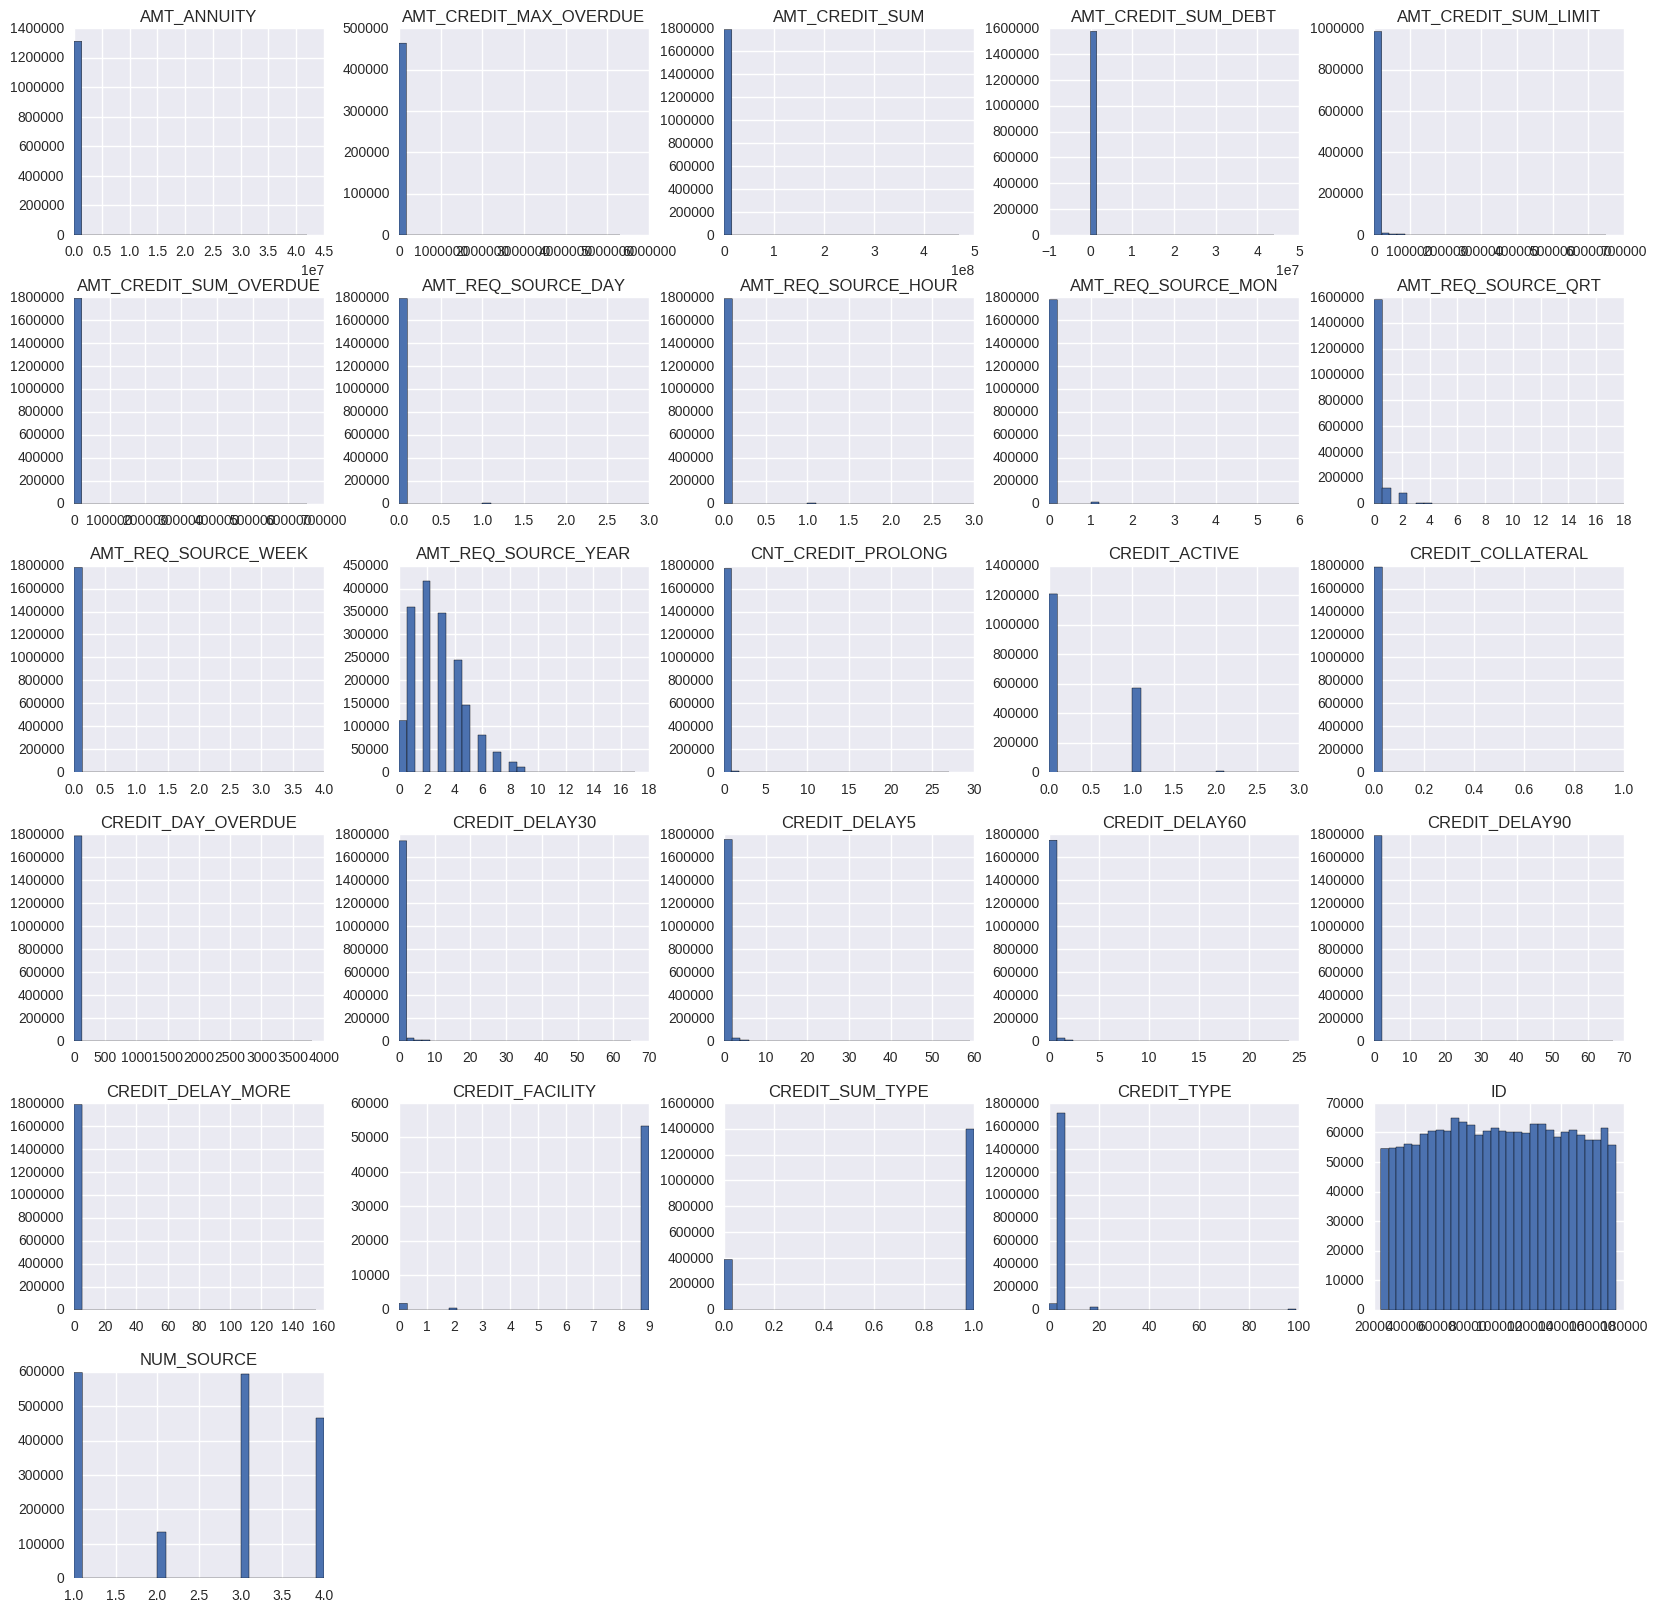

In [94]:
_ = train.hist(train.columns, bins=30, figsize=(20, 20))

Проверим, что одному ID соответствует только по одному уникальному значению DEF:

In [24]:
train[['ID', 'DEF']].groupby('ID')['DEF'].nunique().unique()

array([1])

In [28]:
y = train[['ID', 'DEF']].drop_duplicates().set_index('ID')

In [29]:
train.drop(['DEF'], inplace=True, axis=1)

In [30]:
print train.shape, y.shape

(1787571, 33) (135155, 1)


In [31]:
y['DEF'].value_counts()

0    130624
1      4531
Name: DEF, dtype: int64

Классы довольно несбалансированы.

In [54]:
train['CREDIT_FACILITY'].unique()

array([ nan,   9.,   0.,   2.,   1.])

In [69]:
from collections import Counter
Counter(train['CREDIT_FACILITY'].dropna())

Counter({0.0: 1802, 1.0: 30, 2.0: 516, 9.0: 53277})

In [63]:
train.shape[0]

1787571

In [39]:
tmp = train.isnull().sum()
tmp[tmp >= 1]

DTIME_CREDIT_ENDDATE           91370
DTIME_CREDIT_ENDDATE_FACT     571487
CREDIT_FACILITY              1731946
AMT_CREDIT_MAX_OVERDUE       1323482
AMT_CREDIT_SUM                    29
AMT_CREDIT_SUM_DEBT           208766
AMT_CREDIT_SUM_LIMIT          782106
AMT_ANNUITY                   475829
TEXT_PAYMENT_DISCIPLINE         1947
dtype: int64

In [ ]:
train.

Поля, имеющие пропуски:
* DTIME_CREDIT_ENDDATE -планируемая дата окончания кредита
* DTIME_CREDIT_ENDDATE_FACT - фактическая дата окончания кредита
* CREDIT_FACILITY – семантика поля неизвестна
* AMT_CREDIT_MAX_OVERDUE - максимальная просроченная задолженность за все время жизни договора, сумма
* AMT_CREDIT_SUM_DEBT - сумма оставшегося долга
* AMT_CREDIT_SUM_LIMIT – лимит (для карт)
* AMT_ANNUITY - сумма ежемесячного платежа
* TEXT_PAYMENT_DISCIPLINE - платежная строка, вектор статусов платежей по кредиту, возможные статусы:
    * 0 – своевременный платеж
    * 1 – просрочка 1..30 дней
    *    2 – просрочка 31..60 дней
    *    3 – просрочка 61..90 дней
    *    4 – просрочка 91..120 дней
    *    5 – просрочка 121+ дней, передан коллекторам, продан, списан
    *    X – статус неизвестен
    *    C – договор закрыт

Пропуски в данных в основном следуют из-за пропусков в датах

In [44]:
transofrm_to_date(train, ['SK_DATE_DECISION', 'DTIME_CREDIT', 'DTIME_CREDIT_ENDDATE', 'DTIME_CREDIT_ENDDATE_FACT'])

In [45]:
train.head()

ID SK_DATE_DECISION  NUM_SOURCE  CREDIT_ACTIVE  CREDIT_COLLATERAL  \
0  24368       2015-09-01           1              0                  0   
1  24368       2015-09-01           3              0                  0   
2  24368       2015-09-01           4              0                  0   
3  24368       2015-09-01           3              0                  0   
4  24368       2015-09-01           4              0                  0   

  CREDIT_CURRENCY DTIME_CREDIT  CREDIT_DAY_OVERDUE DTIME_CREDIT_ENDDATE  \
0             rur   2011-03-27                   0           2012-01-27   
1             rur   2011-11-03                   0           2014-11-30   
2             rur   2011-11-03                   0           2014-11-30   
3             rur   2012-02-24                   0           2014-02-21   
4             rur   2012-02-24                   0           2014-02-21   

  DTIME_CREDIT_ENDDATE_FACT  \
0                2012-01-25   
1                2014-08-04   
2                2014-08-04   
3                2014-02-21   
4                2014-02-21   

                         ...                          CREDIT_DELAY90  \
0                        ...                                       0   
1                        ...                                       0   
2                        ...                                       0   
3                        ...                                       0   
4                        ...                                       0   

   CREDIT_DELAY_MORE  AMT_REQ_SOURCE_HOUR  AMT_REQ_SOURCE_DAY  \
0                  0                    0                   0   
1                  0                    0                   0   
2                  0                    0                   0   
3                  0                    0                   0   
4                  0                    0                   0   

   AMT_REQ_SOURCE_WEEK  AMT_REQ_SOURCE_MON  AMT_REQ_SOURCE_QRT  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   

   AMT_REQ_SOURCE_YEAR  AMT_ANNUITY  \
0                    3          0.0   
1                    3          0.0   
2                    3          NaN   
3                    3          NaN   
4                    3          NaN   

                             TEXT_PAYMENT_DISCIPLINE  
0  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC0...  
1    CCCCCCCCCCCCCC0X000000000000000000000XXXXXXXXXX  
2    CCCCCCCCCCCCCC000000000000000000000000XXXXXXXXX  
3       CCCCCCCCCCCCCCCCCCCCX0X0XX00000X00X0XX0X00XX  
4       CCCCCCCCCCCCCCCCCCCC000000000000000000000000  

[5 rows x 33 columns]

In [79]:
train[['SK_DATE_DECISION', 'DTIME_CREDIT_ENDDATE', 'DTIME_CREDIT_ENDDATE_FACT', 'CREDIT_DAY_OVERDUE']]

SK_DATE_DECISION DTIME_CREDIT_ENDDATE DTIME_CREDIT_ENDDATE_FACT  \
0             2015-09-01           2012-01-27                2012-01-25   
1             2015-09-01           2014-11-30                2014-08-04   
2             2015-09-01           2014-11-30                2014-08-04   
3             2015-09-01           2014-02-21                2014-02-21   
4             2015-09-01           2014-02-21                2014-02-21   
5             2015-09-01           2015-03-17                       NaT   
6             2015-09-01           2015-03-17                2015-04-07   
7             2015-09-01                  NaT                2015-06-15   
8             2015-09-01                  NaT                       NaT   
9             2015-09-01           2017-06-16                       NaT   
10            2015-09-01                  NaT                2015-07-20   
11            2015-09-01                  NaT                       NaT   
12            2015-09-01           2007-05-14                2008-05-24   
13            2015-09-01           2008-06-04                       NaT   
14            2015-09-01           2007-05-14                2008-05-22   
15            2015-09-01           2007-05-14                2008-05-22   
16            2015-09-01           2012-08-07                2011-08-08   
17            2015-09-01           2013-04-30                       NaT   
18            2015-09-01           2099-12-31                       NaT   
19            2015-09-01           2099-12-31                2014-06-18   
20            2015-09-01                  NaT                2014-06-18   
21            2015-09-01           2014-12-24                2013-11-06   
22            2015-09-01           2007-10-03                2007-10-04   
23            2015-09-01           2007-10-03                2007-10-03   
24            2015-09-01           2008-07-28                2008-07-28   
25            2015-09-01           2008-07-28                2008-07-28   
26            2015-09-01           2015-05-13                2013-01-09   
27            2015-09-01           2013-12-31                2013-12-03   
28            2015-09-01           2015-09-12                       NaT   
29            2015-09-01           2015-09-12                       NaT   
...                  ...                  ...                       ...   
1787541       2016-02-29           2015-08-27                2015-08-27   
1787542       2016-02-29           2014-12-29                2014-07-28   
1787543       2016-02-29           2014-12-29                2014-07-28   
1787544       2016-02-29           2015-11-26                2015-08-26   
1787545       2016-02-29           2015-11-26                2015-08-26   
1787546       2016-02-29           2015-11-26                2015-08-26   
1787547       2016-02-29           2015-11-26                2015-08-26   
1787548       2016-02-29           2011-09-23                2011-09-30   
1787549       2016-02-29           2011-09-23                2011-09-23   
1787550       2016-02-29           2011-09-23                2011-09-23   
1787551       2016-02-29           2012-02-28                2012-02-29   
1787552       2016-02-29           2012-02-28                2012-02-28   
1787553       2016-02-29           2012-02-28                2012-02-28   
1787554       2016-02-29           2014-01-17                2014-01-18   
1787555       2016-02-29           2014-01-17                2014-01-18   
1787556       2016-02-29           2015-09-10                2015-09-15   
1787557       2016-02-29           2015-09-10                2015-09-15   
1787558       2016-02-29           2015-09-10                2015-09-15   
1787559       2016-02-29           2015-04-24                2015-04-24   
1787560       2016-02-29           2015-04-24                2015-04-24   
1787561       2016-02-29           2015-04-24                2015-04-24   
1787562       2016-02-29         

Интересный момент: CREDIT_DAY_OVERDUE не содержит пропусков. Это значит либо что пропуски тут заполнялись какими-то значениями, либо дату фактической выплаты не считали важным в случае своевременного закрытия кредита.

In [83]:
train[train['CREDIT_DAY_OVERDUE'] > 0][['NUM_SOURCE', 'SK_DATE_DECISION', 'DTIME_CREDIT_ENDDATE', 'DTIME_CREDIT_ENDDATE_FACT', 'CREDIT_DAY_OVERDUE']]

NUM_SOURCE SK_DATE_DECISION DTIME_CREDIT_ENDDATE  \
13                2       2015-09-01           2008-06-04   
75                1       2015-09-01           2008-08-14   
179               4       2015-09-01           2015-07-07   
609               1       2015-09-01           2018-07-23   
1064              1       2015-09-01           2015-07-20   
1202              4       2015-09-01           2015-09-23   
1578              4       2015-09-01           2018-01-01   
1643              3       2015-09-01           2009-08-18   
2017              1       2015-09-01           2017-08-28   
2020              4       2015-09-01           2017-08-28   
2210              1       2015-09-01           2009-05-15   
2786              3       2015-09-01           2017-05-12   
3783              3       2015-09-01           2099-12-31   
3865              3       2015-09-01           2009-12-23   
4294              2       2015-09-01           2009-04-17   
5378              1       2015-09-01           2019-02-26   
5379              2       2015-09-01           2019-02-26   
5383              4       2015-09-01           2019-02-26   
5534              2       2015-09-01           2011-04-08   
5733              2       2015-09-01           2015-10-07   
5820              4       2015-09-01           2044-03-07   
5901              3       2015-09-01                  NaT   
6192              1       2015-09-01           2007-12-24   
6255              4       2015-09-01           2015-09-08   
6316              2       2015-09-01           2011-09-12   
6367              4       2015-09-01           2011-12-14   
7164              3       2015-09-01           2016-10-24   
7907              3       2015-09-01           2017-08-28   
7986              1       2015-09-01           2008-09-15   
7987              3       2015-09-01           2008-09-15   
...             ...              ...                  ...   
1779100           4       2016-02-29           2016-08-11   
1779737           1       2016-02-29           2099-12-31   
1779739           4       2016-02-29                  NaT   
1779775           1       2016-02-29           2016-05-31   
1779881           1       2016-02-29           2099-12-31   
1779883           4       2016-02-29                  NaT   
1779889           2       2016-02-29           2019-07-10   
1780079           1       2016-02-29           2022-03-02   
1780688           1       2016-02-29           2012-02-12   
1780689           3       2016-02-29                  NaT   
1780690           4       2016-02-29                  NaT   
1780704           3       2016-02-29           2020-01-09   
1781618           1       2016-02-29           2006-09-21   
1781619           2       2016-02-29           2007-10-18   
1781785           1       2016-02-29           2013-06-26   
1782153           1       2016-02-29           2005-04-07   
1782154           3       2016-02-29           2005-04-07   
1782844           1       2016-02-29           2006-08-15   
1783015           1       2016-02-29           2016-04-18   
1783016           4       2016-02-29           2016-04-18   
1784270           1       2016-02-29           2007-09-17   
1784377           4       2016-02-29                  NaT   
1784862           4       2016-02-29           2016-02-20   
1785286           3       2016-02-29           2010-05-17   
1785496           1       2016-02-29           2008-05-15   
1785802           3       2016-02-29           2009-12-07   
1785803           4       2016-02-29           2009-12-07   
1786663           3       2016-02-29           2018-12-20   
1786664           4       2016-02-29           2018-12-20   
1787261           4       2016-02-29           2017-11-18   

        DTIME_CREDIT_ENDDATE_FACT  CREDIT_DAY_OVERDUE  
13                            NaT                 120  
75                     2009-08-17                2601  
179                           NaT                  56  
60

Проверим согласованность дат:

In [92]:
train.iloc[1787261]['DTIME_CREDIT_ENDDATE'] 

Timestamp('2017-11-18 00:00:00')

In [91]:
train.iloc[1787261]['DTIME_CREDIT_ENDDATE'] + timedelta(days=1)  

Timestamp('2017-11-19 00:00:00')

In [ ]:
for x in train.index:
    if 
    

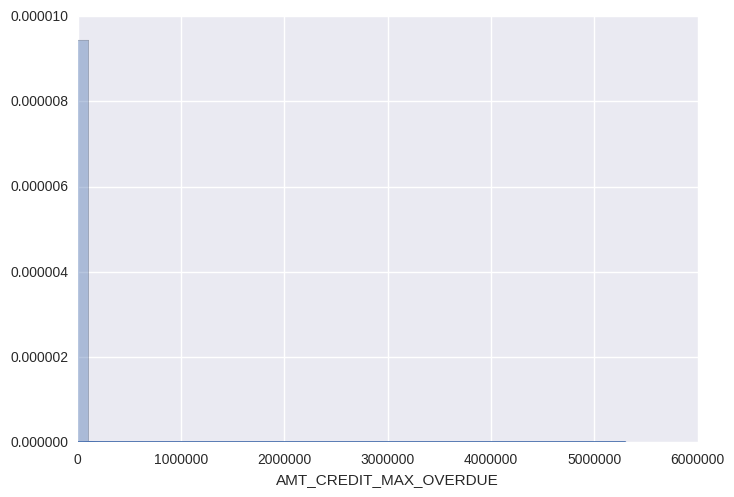

In [77]:
sns.distplot(train['AMT_CREDIT_MAX_OVERDUE'].dropna())

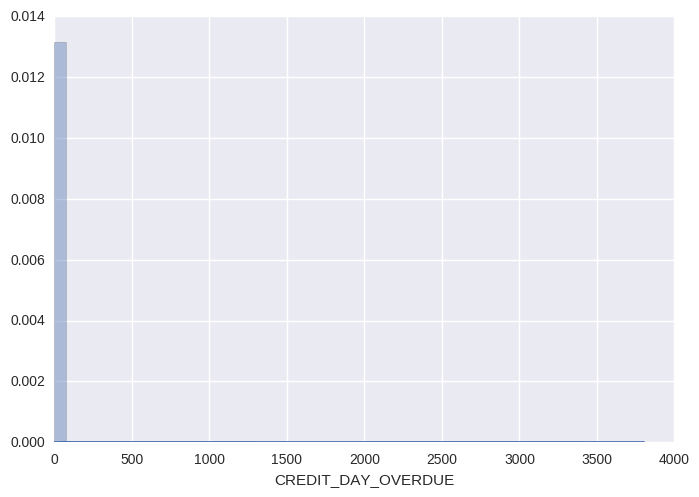

In [76]:
sns.distplot(train['CREDIT_DAY_OVERDUE'].dropna())

Взглянем поближе:

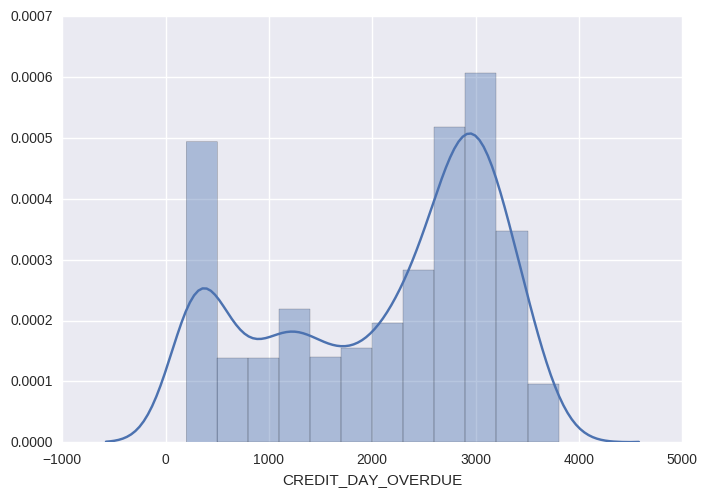

In [78]:
sns.distplot(train[train['CREDIT_DAY_OVERDUE'] > 200]['CREDIT_DAY_OVERDUE'].dropna())

По всей видимости либо нет границы, после которой 

In [46]:
train.groupby('ID')

Выделим данные на тест:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=2017)

Вряд ли источник данных влияет на возврат кредита. Нужно проверить.

In [ ]:
y.head()

In [ ]:
X.head(15)

In [ ]:
X.tail()

In [ ]:
train.head()

In [ ]:
train[['ID', ]].groupby('ID')

In [ ]:
X.head()

In [ ]:
X.iloc[2]

In [ ]:
X.iloc[4]

In [ ]:
X.iloc[0]['TEXT_PAYMENT_DISCIPLINE']

In [ ]:
len(X.iloc[0]['TEXT_PAYMENT_DISCIPLINE'])

In [ ]:
X.dtypes

In [ ]:
X.CREDIT_FACILITY.unique()

In [ ]:
ID
CNT_CREDIT_PROLONG

In [ ]:
X['NUM_SOURCE'].value_counts()

In [ ]:
X.ID.value_counts()

In [ ]:
X[X.ID == 29802]

Может ли быть несколько кредитов одного типа? Наверняка

In [ ]:
for i,j in zip(X.iloc[2], X.iloc[4]):
    if i != j:
        print '{} - {}'.format(i,j)

In [ ]:
X.TEXT_PAYMENT_DISCIPLINE.astype('str').apply(lambda x: len(x))

Важна ли сама дата? Или важны лишь относительные показатели? Если второе, то ,возможно, что кроме разницы в днях есть другая важная дискретизация

In [ ]:
X.

Т.к. абсолютные значения дат будут удалены, разделение на тест и обучение можно сделать не по времени, а случайно и стратифицировано.

Для валидации данные есть, нужно выделить данные для теста.

In [86]:
import xgboost as xgb

In [87]:
params = {}
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'auc'
param['seed'] = 2017

In [ ]:
dtrain = xgb.DMatrix(train, y)

In [ ]:
xgb.cv(params, dtrain, num_boost_round=1000, stratified=True, nfold=5, early_stopping_rounds=30)

In [ ]:
bst = xgb.train(param, dtrain, num_round)

Фичи, которые хотелось бы попробовать, но не успел:
* Перекрытия дат кредитов
* 